# データ数1万でバッチ数maxにして層、ニューロン数の影響を調べる 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from numpy.random import *
X = uniform(0,1000,(10000,2))

In [3]:
X.shape

(10000, 2)

In [4]:
X

array([[737.47419163,  45.27454988],
       [726.43928598, 191.8077124 ],
       [654.20167315, 376.84774789],
       ...,
       [545.50069641, 211.62162803],
       [593.63999222, 463.18057768],
       [355.76209624, 612.50903592]])

In [5]:
X[:,1] = X[:,1]/100

In [6]:
X

array([[7.37474192e+02, 4.52745499e-01],
       [7.26439286e+02, 1.91807712e+00],
       [6.54201673e+02, 3.76847748e+00],
       ...,
       [5.45500696e+02, 2.11621628e+00],
       [5.93639992e+02, 4.63180578e+00],
       [3.55762096e+02, 6.12509036e+00]])

In [7]:
df = pd.DataFrame({"x1": X[0:10000,0],"x2": X[0:10000,1]})

In [8]:
df.tail()

,x1,x2
9995,846.099931,4.537748
9996,322.902520,5.277399
9997,545.500696,2.116216
9998,593.639992,4.631806
9999,355.762096,6.125090


In [9]:
def calc_log(num):
    return math.log(num)

In [10]:
df["a"] = df['x1'].apply(calc_log)

In [11]:
df

,x1,x2,a
0,737.474192,0.452745,6.603231
1,726.439286,1.918077,6.588155
2,654.201673,3.768477,6.483416
3,891.856842,1.072212,6.793306
4,836.759089,5.466393,6.729536
5,433.119713,1.164897,6.071014
6,205.365129,6.781960,5.324790
7,400.366974,8.050183,5.992382
8,222.156713,3.679040,5.403383
9,950.503815,9.172138,6.856992


In [12]:
t1= np.where(df["a"] >= df["x2"],0,1)
t2= np.where(df["a"] >= df["x2"],1,0)

In [13]:
df["off"] = t1
df["on"] = t2

In [14]:
df.head()

,x1,x2,a,off,on
0,737.474192,0.452745,6.603231,0,1
1,726.439286,1.918077,6.588155,0,1
2,654.201673,3.768477,6.483416,0,1
3,891.856842,1.072212,6.793306,0,1
4,836.759089,5.466393,6.729536,0,1


In [15]:
df1 = df[df.on==1]

In [16]:
df2 = df[df.on==0]

In [17]:
df2.head()

,x1,x2,a,off,on
6,205.365129,6.781960,5.324790,1,0
7,400.366974,8.050183,5.992382,1,0
9,950.503815,9.172138,6.856992,1,0
11,859.209319,9.727321,6.756013,1,0
16,523.648387,6.506570,6.260820,1,0


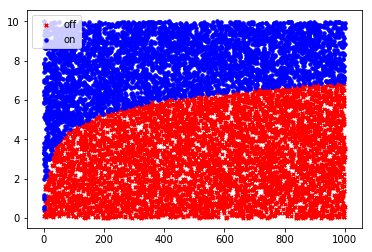

In [18]:
plt.scatter(df1["x1"], df1["x2"],
            color='red', marker='x', label='off', s= 12)
plt.scatter(df2["x1"], df2["x2"],
            color='blue', marker='o', label='on', s = 12)
plt.legend(loc='upper left')
plt.savefig('non-liner dataset')
plt.show()

In [19]:
t = np.array([t1,t2])

In [20]:
t.T

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [1, 0]])

In [21]:
t[:700].shape

(2, 10000)

In [22]:
t_train = t.T[:700,:]
print(t_train)

[[0 1]
 [0 1]
 [0 1]
 ...
 [0 1]
 [0 1]
 [1 0]]


In [23]:
t_test = t.T[701:,:]
print(t_test)

[[0 1]
 [1 0]
 [0 1]
 ...
 [0 1]
 [0 1]
 [1 0]]


In [24]:
t_train.shape

(700, 2)

In [25]:
t_test.shape

(9299, 2)

In [26]:
(x_train, x_test) = (X[:700],X[701:])

In [27]:
x_train.shape

(700, 2)

In [28]:
x_test.shape

(9299, 2)

In [29]:
train_size = x_train.shape[0]

In [30]:
train_size

700

In [35]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam



In [36]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

max_epochs = 50
train_size = x_train.shape[0]
batch_size = 7000
learning_rate = 0.001
iter_nums = 30000

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=2, hidden_size_list=[1000, 1000, 1000], output_size=2,
                                     weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=2, hidden_size_list=[1000, 1000, 1000], output_size=2,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(iter_nums):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list

# データ数1万でバッチ数maxにして層、ニューロン数の影響を調べる 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from numpy.random import *
X = uniform(0,1000,(10000,2))

In [3]:
X.shape

(10000, 2)

In [4]:
X

array([[737.47419163,  45.27454988],
       [726.43928598, 191.8077124 ],
       [654.20167315, 376.84774789],
       ...,
       [545.50069641, 211.62162803],
       [593.63999222, 463.18057768],
       [355.76209624, 612.50903592]])

In [5]:
X[:,1] = X[:,1]/100

In [6]:
X

array([[7.37474192e+02, 4.52745499e-01],
       [7.26439286e+02, 1.91807712e+00],
       [6.54201673e+02, 3.76847748e+00],
       ...,
       [5.45500696e+02, 2.11621628e+00],
       [5.93639992e+02, 4.63180578e+00],
       [3.55762096e+02, 6.12509036e+00]])

In [7]:
df = pd.DataFrame({"x1": X[0:10000,0],"x2": X[0:10000,1]})

In [8]:
df.tail()

,x1,x2
9995,846.099931,4.537748
9996,322.902520,5.277399
9997,545.500696,2.116216
9998,593.639992,4.631806
9999,355.762096,6.125090


In [9]:
def calc_log(num):
    return math.log(num)

In [10]:
df["a"] = df['x1'].apply(calc_log)

In [11]:
df

,x1,x2,a
0,737.474192,0.452745,6.603231
1,726.439286,1.918077,6.588155
2,654.201673,3.768477,6.483416
3,891.856842,1.072212,6.793306
4,836.759089,5.466393,6.729536
5,433.119713,1.164897,6.071014
6,205.365129,6.781960,5.324790
7,400.366974,8.050183,5.992382
8,222.156713,3.679040,5.403383
9,950.503815,9.172138,6.856992


In [12]:
t1= np.where(df["a"] >= df["x2"],0,1)
t2= np.where(df["a"] >= df["x2"],1,0)

In [13]:
df["off"] = t1
df["on"] = t2

In [14]:
df.head()

,x1,x2,a,off,on
0,737.474192,0.452745,6.603231,0,1
1,726.439286,1.918077,6.588155,0,1
2,654.201673,3.768477,6.483416,0,1
3,891.856842,1.072212,6.793306,0,1
4,836.759089,5.466393,6.729536,0,1


In [15]:
df1 = df[df.on==1]

In [16]:
df2 = df[df.on==0]

In [17]:
df2.head()

,x1,x2,a,off,on
6,205.365129,6.781960,5.324790,1,0
7,400.366974,8.050183,5.992382,1,0
9,950.503815,9.172138,6.856992,1,0
11,859.209319,9.727321,6.756013,1,0
16,523.648387,6.506570,6.260820,1,0


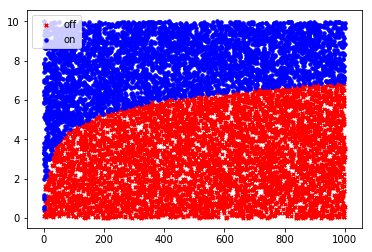

In [18]:
plt.scatter(df1["x1"], df1["x2"],
            color='red', marker='x', label='off', s= 12)
plt.scatter(df2["x1"], df2["x2"],
            color='blue', marker='o', label='on', s = 12)
plt.legend(loc='upper left')
plt.savefig('non-liner dataset')
plt.show()

In [19]:
t = np.array([t1,t2])

In [20]:
t.T

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [1, 0]])

In [21]:
t[:700].shape

(2, 10000)

In [22]:
t_train = t.T[:700,:]
print(t_train)

[[0 1]
 [0 1]
 [0 1]
 ...
 [0 1]
 [0 1]
 [1 0]]


In [23]:
t_test = t.T[701:,:]
print(t_test)

[[0 1]
 [1 0]
 [0 1]
 ...
 [0 1]
 [0 1]
 [1 0]]


In [24]:
t_train.shape

(700, 2)

In [25]:
t_test.shape

(9299, 2)

In [26]:
(x_train, x_test) = (X[:700],X[701:])

In [27]:
x_train.shape

(700, 2)

In [28]:
x_test.shape

(9299, 2)

In [29]:
train_size = x_train.shape[0]

In [30]:
train_size

700

In [35]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam



In [36]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

max_epochs = 50
train_size = x_train.shape[0]
batch_size = 7000
learning_rate = 0.001
iter_nums = 30000

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=2, hidden_size_list=[1000, 1000, 1000], output_size=2,
                                     weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=2, hidden_size_list=[1000, 1000, 1000], output_size=2,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(iter_nums):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list

In [37]:
train_acc_list03, bn_train_acc_list03 = __train('He')

epoch:0 | 0.3942857142857143 - 0.3942857142857143
epoch:1 | 0.6057142857142858 - 0.39571428571428574
epoch:2 | 0.6057142857142858 - 0.39571428571428574
epoch:3 | 0.3942857142857143 - 0.4157142857142857
epoch:4 | 0.6057142857142858 - 0.6571428571428571
epoch:5 | 0.6057142857142858 - 0.79
epoch:6 | 0.3942857142857143 - 0.8071428571428572
epoch:7 | 0.6057142857142858 - 0.8314285714285714
epoch:8 | 0.6057142857142858 - 0.8285714285714286
epoch:9 | 0.3942857142857143 - 0.84
epoch:10 | 0.6057142857142858 - 0.8385714285714285


KeyboardInterrupt: 

In [32]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

max_epochs = 50
train_size = x_train.shape[0]
batch_size = 7000
learning_rate = 0.001
iter_nums = 30000

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=2, hidden_size_list=[500, 500, 500], output_size=2,
                                     weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=2, hidden_size_list=[500, 500, 500], output_size=2,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(iter_nums):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list

In [33]:
train_acc_list01, bn_train_acc_list01 = __train('He')

epoch:0 | 0.5642857142857143 - 0.6428571428571429
epoch:1 | 0.4357142857142857 - 0.6571428571428571
epoch:2 | 0.4357142857142857 - 0.6385714285714286
epoch:3 | 0.5642857142857143 - 0.6857142857142857
epoch:4 | 0.4357142857142857 - 0.6442857142857142
epoch:5 | 0.43 - 0.6828571428571428
epoch:6 | 0.5642857142857143 - 0.67
epoch:7 | 0.4357142857142857 - 0.7328571428571429
epoch:8 | 0.5642857142857143 - 0.7185714285714285
epoch:9 | 0.4357142857142857 - 0.7628571428571429
epoch:10 | 0.5642857142857143 - 0.8142857142857143
epoch:11 | 0.5642857142857143 - 0.79
epoch:12 | 0.4357142857142857 - 0.8228571428571428
epoch:13 | 0.5642857142857143 - 0.8642857142857143
epoch:14 | 0.5642857142857143 - 0.84
epoch:15 | 0.5642857142857143 - 0.8528571428571429
epoch:16 | 0.5642857142857143 - 0.8928571428571429
epoch:17 | 0.5642857142857143 - 0.8642857142857143
epoch:18 | 0.5642857142857143 - 0.8657142857142858
epoch:19 | 0.5642857142857143 - 0.86
epoch:20 | 0.5642857142857143 - 0.8871428571428571
epoch:21 

In [34]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

max_epochs = 50
train_size = x_train.shape[0]
batch_size = 7000
learning_rate = 0.001
iter_nums = 30000

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=2, hidden_size_list=[10, 10, 10], output_size=2,
                                     weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=2, hidden_size_list=[10, 10, 10], output_size=2,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(iter_nums):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list

In [35]:
train_acc_list02, bn_train_acc_list02 = __train('He')

epoch:0 | 0.4357142857142857 - 0.5642857142857143
epoch:1 | 0.5657142857142857 - 0.5642857142857143
epoch:2 | 0.5685714285714286 - 0.5642857142857143
epoch:3 | 0.57 - 0.5614285714285714
epoch:4 | 0.57 - 0.5585714285714286
epoch:5 | 0.5714285714285714 - 0.56
epoch:6 | 0.4357142857142857 - 0.5585714285714286
epoch:7 | 0.4357142857142857 - 0.5585714285714286
epoch:8 | 0.4357142857142857 - 0.5485714285714286
epoch:9 | 0.4357142857142857 - 0.55
epoch:10 | 0.4357142857142857 - 0.5457142857142857
epoch:11 | 0.4357142857142857 - 0.5585714285714286
epoch:12 | 0.4357142857142857 - 0.5542857142857143
epoch:13 | 0.4357142857142857 - 0.5542857142857143
epoch:14 | 0.4357142857142857 - 0.5485714285714286
epoch:15 | 0.4357142857142857 - 0.5514285714285714
epoch:16 | 0.4357142857142857 - 0.5471428571428572
epoch:17 | 0.4357142857142857 - 0.5457142857142857
epoch:18 | 0.4357142857142857 - 0.5457142857142857
epoch:19 | 0.4357142857142857 - 0.5457142857142857
epoch:20 | 0.4357142857142857 - 0.547142857142

In [36]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

max_epochs = 50
train_size = x_train.shape[0]
batch_size = 7000
learning_rate = 0.001
iter_nums = 30000

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=2, hidden_size_list=[100, 100, 100], output_size=2,
                                     weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=2, hidden_size_list=[10, 10, 10], output_size=2,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(iter_nums):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list

In [37]:
train_acc_list00, bn_train_acc_list00 = __train('He')

epoch:0 | 0.4357142857142857 - 0.4357142857142857
epoch:1 | 0.5642857142857143 - 0.4357142857142857
epoch:2 | 0.5642857142857143 - 0.4657142857142857
epoch:3 | 0.5714285714285714 - 0.5728571428571428
epoch:4 | 0.58 - 0.5142857142857142
epoch:5 | 0.43 - 0.6671428571428571
epoch:6 | 0.5814285714285714 - 0.4471428571428571
epoch:7 | 0.43 - 0.7557142857142857
epoch:8 | 0.5828571428571429 - 0.5114285714285715
epoch:9 | 0.43 - 0.6957142857142857
epoch:10 | 0.5828571428571429 - 0.4585714285714286
epoch:11 | 0.5814285714285714 - 0.47285714285714286
epoch:12 | 0.5842857142857143 - 0.77
epoch:13 | 0.5842857142857143 - 0.6028571428571429
epoch:14 | 0.5842857142857143 - 0.4614285714285714
epoch:15 | 0.5842857142857143 - 0.7528571428571429
epoch:16 | 0.5842857142857143 - 0.5785714285714286
epoch:17 | 0.5828571428571429 - 0.4642857142857143
epoch:18 | 0.5842857142857143 - 0.6585714285714286
epoch:19 | 0.5828571428571429 - 0.66
epoch:20 | 0.5842857142857143 - 0.5642857142857143
epoch:21 | 0.582857142

Text(0.5,1,'Newron Size')

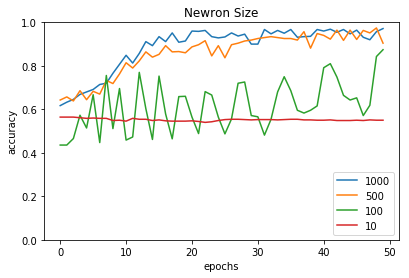

In [39]:
# グラフの描画
plt.figure(figsize=(14,4)) # figureの縦横の大きさ
markers = {'train': 'o', 'test': 's'}
a = np.arange(len(bn_train_acc_list00))
plt.subplot(1,2,1)
plt.plot(a, bn_train_acc_list03, label='1000', markevery=2)
plt.plot(a, bn_train_acc_list01, label='500', markevery=2)
plt.plot(a, bn_train_acc_list00, label='100', markevery=2)
plt.plot(a, bn_train_acc_list02, label='10', markevery=2)
plt.xlabel('epochs')
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.title('Newron Size')

## 層の数

In [40]:
max_epochs = 50
train_size = x_train.shape[0]
batch_size = 7000
learning_rate = 0.001
iter_nums = 30000

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=2, hidden_size_list=[100], output_size=2,
                                     weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=2, hidden_size_list=[100], output_size=2,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(iter_nums):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list

In [41]:
train_acc_list30, bn_train_acc_list30 = __train('He')

epoch:0 | 0.5642857142857143 - 0.40285714285714286
epoch:1 | 0.5642857142857143 - 0.38142857142857145
epoch:2 | 0.4357142857142857 - 0.38857142857142857
epoch:3 | 0.5642857142857143 - 0.39571428571428574
epoch:4 | 0.5714285714285714 - 0.4114285714285714
epoch:5 | 0.4357142857142857 - 0.4157142857142857
epoch:6 | 0.5642857142857143 - 0.42428571428571427
epoch:7 | 0.4357142857142857 - 0.42
epoch:8 | 0.5642857142857143 - 0.4257142857142857
epoch:9 | 0.5671428571428572 - 0.42857142857142855
epoch:10 | 0.4357142857142857 - 0.4357142857142857
epoch:11 | 0.5642857142857143 - 0.4328571428571429
epoch:12 | 0.4357142857142857 - 0.43857142857142856
epoch:13 | 0.5642857142857143 - 0.44285714285714284
epoch:14 | 0.5642857142857143 - 0.4471428571428571
epoch:15 | 0.4357142857142857 - 0.44571428571428573
epoch:16 | 0.5642857142857143 - 0.4542857142857143
epoch:17 | 0.4357142857142857 - 0.44571428571428573
epoch:18 | 0.5642857142857143 - 0.4442857142857143
epoch:19 | 0.5714285714285714 - 0.44142857142

In [42]:
max_epochs = 50
train_size = x_train.shape[0]
batch_size = 7000
learning_rate = 0.001
iter_nums = 30000

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=2, hidden_size_list=[100,100,100,100,100,100], output_size=2,
                                     weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=2, hidden_size_list=[100,100,100,100,100,100], output_size=2,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(iter_nums):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list

In [43]:
train_acc_list31, bn_train_acc_list31 = __train('He')

epoch:0 | 0.5642857142857143 - 0.4142857142857143
epoch:1 | 0.4357142857142857 - 0.38571428571428573
epoch:2 | 0.5642857142857143 - 0.3757142857142857
epoch:3 | 0.4357142857142857 - 0.4042857142857143
epoch:4 | 0.5642857142857143 - 0.3871428571428571
epoch:5 | 0.4357142857142857 - 0.4157142857142857
epoch:6 | 0.5642857142857143 - 0.4328571428571429
epoch:7 | 0.4357142857142857 - 0.45285714285714285


../common/functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)
../common/layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)


epoch:8 | 0.4357142857142857 - 0.48142857142857143


/Users/Kohei/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


epoch:9 | 0.4357142857142857 - 0.5228571428571429
epoch:10 | 0.4357142857142857 - 0.45714285714285713
epoch:11 | 0.4357142857142857 - 0.5757142857142857
epoch:12 | 0.4357142857142857 - 0.5571428571428572
epoch:13 | 0.4357142857142857 - 0.7414285714285714
epoch:14 | 0.4357142857142857 - 0.5342857142857143
epoch:15 | 0.4357142857142857 - 0.6971428571428572
epoch:16 | 0.4357142857142857 - 0.7342857142857143
epoch:17 | 0.4357142857142857 - 0.7928571428571428
epoch:18 | 0.4357142857142857 - 0.7285714285714285
epoch:19 | 0.4357142857142857 - 0.81
epoch:20 | 0.4357142857142857 - 0.8128571428571428
epoch:21 | 0.4357142857142857 - 0.84
epoch:22 | 0.4357142857142857 - 0.78
epoch:23 | 0.4357142857142857 - 0.8557142857142858
epoch:24 | 0.4357142857142857 - 0.8571428571428571
epoch:25 | 0.4357142857142857 - 0.8957142857142857
epoch:26 | 0.4357142857142857 - 0.8714285714285714
epoch:27 | 0.4357142857142857 - 0.8971428571428571
epoch:28 | 0.4357142857142857 - 0.8328571428571429
epoch:29 | 0.435714285

Text(0.5,1,'Layer Num')

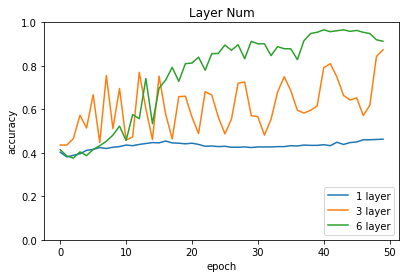

In [44]:
# グラフの描画
plt.figure(figsize=(14,4)) # figureの縦横の大きさ
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(bn_train_acc_list30))
plt.subplot(1,2,1)
plt.plot(x, bn_train_acc_list30, label='1 layer', markevery=2)
plt.plot(x, bn_train_acc_list00, label='3 layer', markevery=2)
plt.plot(x, bn_train_acc_list31, label='6 layer', markevery=2)
plt.xlabel('epoch')
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.title('Layer Num')

In [45]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

max_epochs = 100
train_size = x_train.shape[0]
batch_size = 7000
learning_rate = 0.001
iter_nums = 30000

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=2, hidden_size_list=[1000, 1000, 1000], output_size=2,
                                     weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=2, hidden_size_list=[1000, 1000, 1000], output_size=2,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(iter_nums):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list

In [46]:
train_acc_list03, bn_train_acc_list03 = __train('He')

epoch:0 | 0.5642857142857143 - 0.4357142857142857
epoch:1 | 0.4357142857142857 - 0.43857142857142856
epoch:2 | 0.4342857142857143 - 0.44285714285714284
epoch:3 | 0.4357142857142857 - 0.45
epoch:4 | 0.5642857142857143 - 0.4757142857142857
epoch:5 | 0.5642857142857143 - 0.5071428571428571
epoch:6 | 0.4357142857142857 - 0.5414285714285715
epoch:7 | 0.5642857142857143 - 0.5971428571428572
epoch:8 | 0.5642857142857143 - 0.6671428571428571
epoch:9 | 0.4357142857142857 - 0.7228571428571429
epoch:10 | 0.5642857142857143 - 0.7671428571428571
epoch:11 | 0.4357142857142857 - 0.8085714285714286
epoch:12 | 0.5642857142857143 - 0.8385714285714285
epoch:13 | 0.5642857142857143 - 0.8557142857142858
epoch:14 | 0.5642857142857143 - 0.8757142857142857
epoch:15 | 0.5642857142857143 - 0.9028571428571428
epoch:16 | 0.5642857142857143 - 0.9185714285714286
epoch:17 | 0.5642857142857143 - 0.9214285714285714
epoch:18 | 0.5642857142857143 - 0.9414285714285714
epoch:19 | 0.5642857142857143 - 0.9542857142857143
ep

In [47]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

max_epochs = 100
train_size = x_train.shape[0]
batch_size = 7000
learning_rate = 0.001
iter_nums = 30000

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=2, hidden_size_list=[500, 500, 500], output_size=2,
                                     weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=2, hidden_size_list=[500, 500, 500], output_size=2,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(iter_nums):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list

In [48]:
train_acc_list01, bn_train_acc_list01 = __train('He')

epoch:0 | 0.4357142857142857 - 0.6128571428571429
epoch:1 | 0.5642857142857143 - 0.6228571428571429
epoch:2 | 0.4357142857142857 - 0.6285714285714286
epoch:3 | 0.5642857142857143 - 0.6342857142857142
epoch:4 | 0.4357142857142857 - 0.6328571428571429
epoch:5 | 0.5642857142857143 - 0.6585714285714286
epoch:6 | 0.4357142857142857 - 0.6857142857142857
epoch:7 | 0.4357142857142857 - 0.7142857142857143
epoch:8 | 0.5642857142857143 - 0.7428571428571429
epoch:9 | 0.4357142857142857 - 0.7657142857142857
epoch:10 | 0.5642857142857143 - 0.7828571428571428


../common/functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)
../common/layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)


epoch:11 | 0.4357142857142857 - 0.8114285714285714


/Users/Kohei/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


epoch:12 | 0.4357142857142857 - 0.8271428571428572
epoch:13 | 0.4357142857142857 - 0.8371428571428572
epoch:14 | 0.4357142857142857 - 0.8442857142857143
epoch:15 | 0.4357142857142857 - 0.8514285714285714
epoch:16 | 0.4357142857142857 - 0.8557142857142858
epoch:17 | 0.4357142857142857 - 0.8685714285714285
epoch:18 | 0.4357142857142857 - 0.8728571428571429
epoch:19 | 0.4357142857142857 - 0.8885714285714286
epoch:20 | 0.4357142857142857 - 0.8957142857142857
epoch:21 | 0.4357142857142857 - 0.8985714285714286
epoch:22 | 0.4357142857142857 - 0.9071428571428571
epoch:23 | 0.4357142857142857 - 0.91
epoch:24 | 0.4357142857142857 - 0.91
epoch:25 | 0.4357142857142857 - 0.9157142857142857
epoch:26 | 0.4357142857142857 - 0.9157142857142857
epoch:27 | 0.4357142857142857 - 0.92
epoch:28 | 0.4357142857142857 - 0.9328571428571428
epoch:29 | 0.4357142857142857 - 0.93
epoch:30 | 0.4357142857142857 - 0.93
epoch:31 | 0.4357142857142857 - 0.9357142857142857
epoch:32 | 0.4357142857142857 - 0.9371428571428572

In [50]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

max_epochs = 100
train_size = x_train.shape[0]
batch_size = 7000
learning_rate = 0.001
iter_nums = 30000

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=2, hidden_size_list=[10, 10, 10], output_size=2,
                                     weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=2, hidden_size_list=[10, 10, 10], output_size=2,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(iter_nums):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list

In [51]:
train_acc_list02, bn_train_acc_list02 = __train('He')

epoch:0 | 0.5642857142857143 - 0.40714285714285714
epoch:1 | 0.5642857142857143 - 0.39285714285714285
epoch:2 | 0.4328571428571429 - 0.4157142857142857
epoch:3 | 0.5642857142857143 - 0.4185714285714286
epoch:4 | 0.4085714285714286 - 0.4057142857142857
epoch:5 | 0.5642857142857143 - 0.4014285714285714
epoch:6 | 0.5642857142857143 - 0.4142857142857143
epoch:7 | 0.43142857142857144 - 0.4328571428571429
epoch:8 | 0.5642857142857143 - 0.44285714285714284
epoch:9 | 0.4114285714285714 - 0.44
epoch:10 | 0.5642857142857143 - 0.44
epoch:11 | 0.5657142857142857 - 0.4514285714285714
epoch:12 | 0.42 - 0.46
epoch:13 | 0.5657142857142857 - 0.4614285714285714
epoch:14 | 0.48 - 0.4614285714285714
epoch:15 | 0.5657142857142857 - 0.4657142857142857
epoch:16 | 0.42 - 0.45571428571428574
epoch:17 | 0.5657142857142857 - 0.46714285714285714
epoch:18 | 0.7657142857142857 - 0.47714285714285715
epoch:19 | 0.5642857142857143 - 0.4857142857142857
epoch:20 | 0.4142857142857143 - 0.48714285714285716
epoch:21 | 0.56

In [52]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

max_epochs = 100
train_size = x_train.shape[0]
batch_size = 7000
learning_rate = 0.001
iter_nums = 30000

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=2, hidden_size_list=[100, 100, 100], output_size=2,
                                     weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=2, hidden_size_list=[10, 10, 10], output_size=2,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(iter_nums):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list

In [53]:
train_acc_list00, bn_train_acc_list00 = __train('He')

epoch:0 | 0.5642857142857143 - 0.4357142857142857
epoch:1 | 0.5642857142857143 - 0.40714285714285714
epoch:2 | 0.5657142857142857 - 0.38857142857142857
epoch:3 | 0.4342857142857143 - 0.39714285714285713
epoch:4 | 0.5657142857142857 - 0.42
epoch:5 | 0.4342857142857143 - 0.42857142857142855
epoch:6 | 0.5657142857142857 - 0.44571428571428573
epoch:7 | 0.4342857142857143 - 0.45714285714285713
epoch:8 | 0.5657142857142857 - 0.4685714285714286
epoch:9 | 0.4342857142857143 - 0.48
epoch:10 | 0.5657142857142857 - 0.5014285714285714
epoch:11 | 0.4342857142857143 - 0.5085714285714286
epoch:12 | 0.5657142857142857 - 0.5328571428571428
epoch:13 | 0.4342857142857143 - 0.5714285714285714
epoch:14 | 0.5657142857142857 - 0.5771428571428572
epoch:15 | 0.4342857142857143 - 0.5928571428571429
epoch:16 | 0.5657142857142857 - 0.6171428571428571
epoch:17 | 0.4342857142857143 - 0.6285714285714286
epoch:18 | 0.5657142857142857 - 0.6428571428571429
epoch:19 | 0.4342857142857143 - 0.6528571428571428
epoch:20 | 0

Text(0.5,1,'Newron Size')

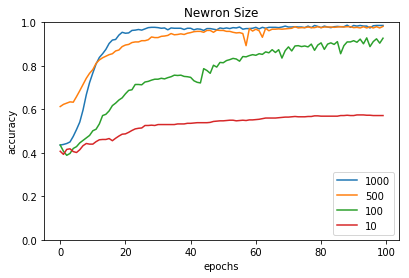

In [54]:
# グラフの描画
plt.figure(figsize=(14,4)) # figureの縦横の大きさ
markers = {'train': 'o', 'test': 's'}
a = np.arange(len(bn_train_acc_list00))
plt.subplot(1,2,1)
plt.plot(a, bn_train_acc_list03, label='1000', markevery=2)
plt.plot(a, bn_train_acc_list01, label='500', markevery=2)
plt.plot(a, bn_train_acc_list00, label='100', markevery=2)
plt.plot(a, bn_train_acc_list02, label='10', markevery=2)
plt.xlabel('epochs')
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.title('Newron Size')

## 層の数

In [55]:
max_epochs = 100
train_size = x_train.shape[0]
batch_size = 7000
learning_rate = 0.001
iter_nums = 30000

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=2, hidden_size_list=[100], output_size=2,
                                     weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=2, hidden_size_list=[100], output_size=2,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(iter_nums):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list

In [56]:
train_acc_list30, bn_train_acc_list30 = __train('He')

epoch:0 | 0.4357142857142857 - 0.5642857142857143
epoch:1 | 0.5642857142857143 - 0.5642857142857143
epoch:2 | 0.4357142857142857 - 0.5585714285714286
epoch:3 | 0.5642857142857143 - 0.5628571428571428
epoch:4 | 0.5642857142857143 - 0.5571428571428572
epoch:5 | 0.4357142857142857 - 0.5557142857142857
epoch:6 | 0.5642857142857143 - 0.5585714285714286
epoch:7 | 0.4357142857142857 - 0.56
epoch:8 | 0.5642857142857143 - 0.5585714285714286
epoch:9 | 0.5642857142857143 - 0.56
epoch:10 | 0.4357142857142857 - 0.5571428571428572
epoch:11 | 0.5642857142857143 - 0.56
epoch:12 | 0.4357142857142857 - 0.5557142857142857
epoch:13 | 0.5642857142857143 - 0.5557142857142857
epoch:14 | 0.5642857142857143 - 0.5542857142857143
epoch:15 | 0.4357142857142857 - 0.5514285714285714
epoch:16 | 0.5642857142857143 - 0.55
epoch:17 | 0.4357142857142857 - 0.5514285714285714
epoch:18 | 0.5642857142857143 - 0.5528571428571428
epoch:19 | 0.5642857142857143 - 0.5542857142857143
epoch:20 | 0.4357142857142857 - 0.557142857142

In [58]:
max_epochs = 100
train_size = x_train.shape[0]
batch_size = 7000
learning_rate = 0.001
iter_nums = 30000

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=2, hidden_size_list=[100,100,100,100,100,100], output_size=2,
                                     weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=2, hidden_size_list=[100,100,100,100,100,100], output_size=2,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(iter_nums):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list

In [59]:
train_acc_list31, bn_train_acc_list31 = __train('He')

epoch:0 | 0.5642857142857143 - 0.2857142857142857
epoch:1 | 0.4357142857142857 - 0.30857142857142855
epoch:2 | 0.4142857142857143 - 0.32285714285714284
epoch:3 | 0.5685714285714286 - 0.2857142857142857
epoch:4 | 0.5714285714285714 - 0.32285714285714284
epoch:5 | 0.5714285714285714 - 0.32571428571428573
epoch:6 | 0.43 - 0.3028571428571429
epoch:7 | 0.5714285714285714 - 0.3
epoch:8 | 0.43142857142857144 - 0.32857142857142857
epoch:9 | 0.5642857142857143 - 0.38142857142857145
epoch:10 | 0.5642857142857143 - 0.4471428571428571
epoch:11 | 0.5642857142857143 - 0.47714285714285715
epoch:12 | 0.5642857142857143 - 0.54
epoch:13 | 0.5642857142857143 - 0.6028571428571429
epoch:14 | 0.5642857142857143 - 0.6328571428571429
epoch:15 | 0.5642857142857143 - 0.6785714285714286
epoch:16 | 0.5642857142857143 - 0.7014285714285714
epoch:17 | 0.5642857142857143 - 0.7328571428571429
epoch:18 | 0.5671428571428572 - 0.77
epoch:19 | 0.5671428571428572 - 0.7885714285714286
epoch:20 | 0.5685714285714286 - 0.80428

Text(0.5,1,'Layer Num')

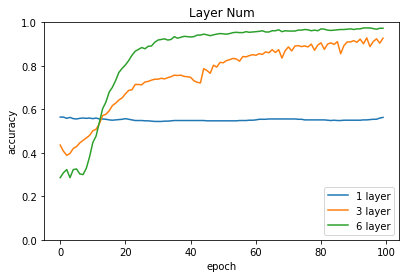

In [60]:
# グラフの描画
plt.figure(figsize=(14,4)) # figureの縦横の大きさ
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(bn_train_acc_list30))
plt.subplot(1,2,1)
plt.plot(x, bn_train_acc_list30, label='1 layer', markevery=2)
plt.plot(x, bn_train_acc_list00, label='3 layer', markevery=2)
plt.plot(x, bn_train_acc_list31, label='6 layer', markevery=2)
plt.xlabel('epoch')
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.title('Layer Num')

In [38]:
max_epochs = 100
train_size = x_train.shape[0]
batch_size = 7000
learning_rate = 0.001
iter_nums = 30000

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=2, hidden_size_list=[1000,1000,1000,1000,1000,1000], output_size=2,
                                     weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=2, hidden_size_list=[1000,1000,1000,1000,1000,1000], output_size=2,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(iter_nums):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list

In [39]:
train_acc_list, bn_train_acc_list31 = __train('He')

epoch:0 | 0.6057142857142858 - 0.6357142857142857
epoch:1 | 0.3942857142857143 - 0.6628571428571428
epoch:2 | 0.6057142857142858 - 0.6014285714285714
epoch:3 | 0.3942857142857143 - 0.6214285714285714


../common/layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)


epoch:4 | 0.3942857142857143 - 0.5742857142857143


../common/multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
../common/multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/Users/Kohei/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/Users/Kohei/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


epoch:5 | 0.3942857142857143 - 0.59
epoch:6 | 0.3942857142857143 - 0.6042857142857143
epoch:7 | 0.3942857142857143 - 0.62
epoch:8 | 0.3942857142857143 - 0.6485714285714286
epoch:9 | 0.3942857142857143 - 0.6442857142857142
epoch:10 | 0.3942857142857143 - 0.7371428571428571
epoch:11 | 0.3942857142857143 - 0.78
epoch:12 | 0.3942857142857143 - 0.7685714285714286
epoch:13 | 0.3942857142857143 - 0.83
epoch:14 | 0.3942857142857143 - 0.8571428571428571
epoch:15 | 0.3942857142857143 - 0.8757142857142857
epoch:16 | 0.3942857142857143 - 0.8214285714285714
epoch:17 | 0.3942857142857143 - 0.8928571428571429
epoch:18 | 0.3942857142857143 - 0.9142857142857143
epoch:19 | 0.3942857142857143 - 0.8771428571428571
epoch:20 | 0.3942857142857143 - 0.9285714285714286
epoch:21 | 0.3942857142857143 - 0.9428571428571428
epoch:22 | 0.3942857142857143 - 0.94
epoch:23 | 0.3942857142857143 - 0.9514285714285714
epoch:24 | 0.3942857142857143 - 0.9357142857142857
epoch:25 | 0.3942857142857143 - 0.9642857142857143
epoc

Text(0.5,1,'Accuracy\nNewron = 1000, Layer Num = 6')

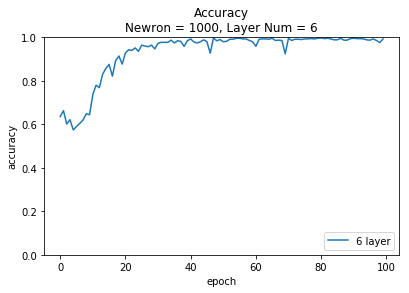

In [40]:
# グラフの描画
plt.figure(figsize=(14,4)) # figureの縦横の大きさ
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(bn_train_acc_list31))
plt.subplot(1,2,1)
plt.plot(x, bn_train_acc_list31, label='6 layer', markevery=2)
plt.xlabel('epoch')
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.title('Accuracy\nNewron = 1000, Layer Num = 6')